Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Import the excel file

In [ ]:
# import from excel
consum_mensual = pd.read_excel('consum_mensual.xls')

Cleansing

In [ ]:
# erase "Totals" since we won't use it
CM = consum_mensual[consum_mensual['Mes'] != 'Totals']

Extraction of months

In [ ]:
# map month to number
month_abbr = {
    'Gen': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6,
    'Jul': 7, 'Ago': 8, 'Set': 9, 'Oct': 10, 'Nov': 11, 'Des': 12
}

Change in electricity consumption over time plot

<ipython-input-5-5015024a4631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM['Year'] = CM['Mes'].apply(lambda x: int(x.split()[1]))
<ipython-input-5-5015024a4631>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM['Month'] = CM['Mes'].apply(lambda x: month_abbr[x.split()[0]])


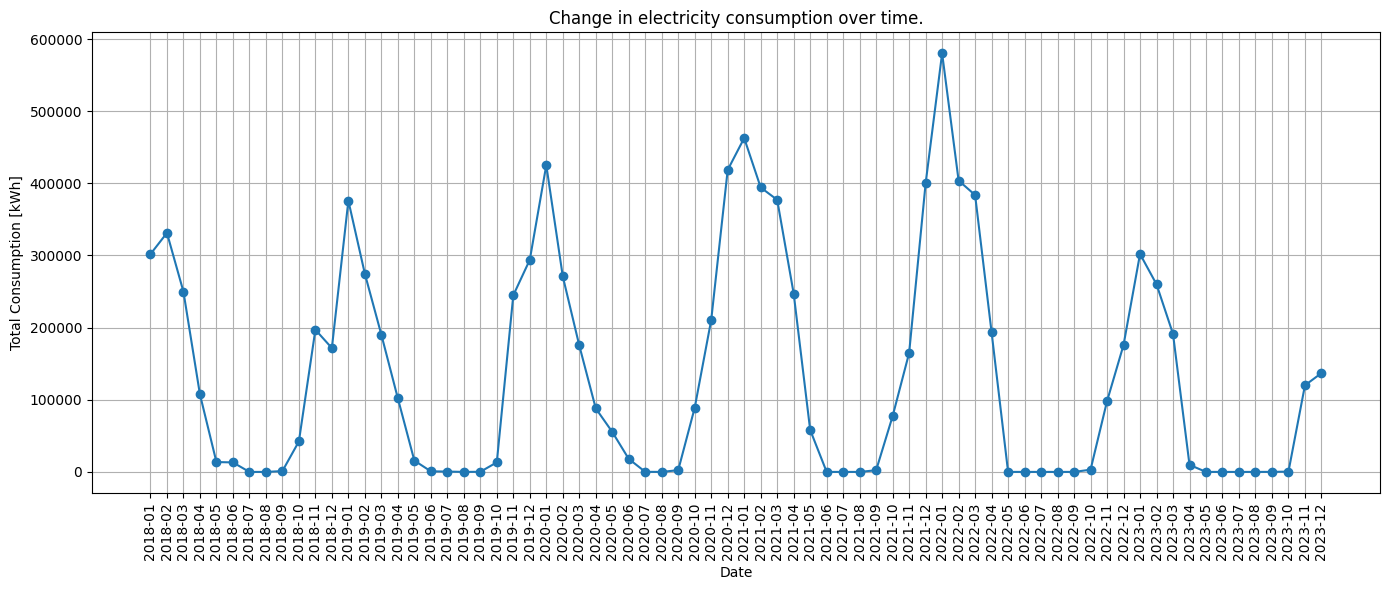

In [ ]:
# extract year and month
CM['Year'] = CM['Mes'].apply(lambda x: int(x.split()[1]))
CM['Month'] = CM['Mes'].apply(lambda x: month_abbr[x.split()[0]])

# total consumption per month
monthly_consumption = CM.groupby(['Year', 'Month'])['Consum [kWh]'].sum()

# convert index to 'YYYY-MM' format
dates = [f'{year}-{month:02d}' for year, month in monthly_consumption.index]

# visualization
plt.figure(figsize=(14, 6))
plt.plot(dates, monthly_consumption.values, marker='o', linestyle='-')
plt.title('Change in electricity consumption over time.')
plt.xlabel('Date')
plt.ylabel('Total Consumption [kWh]')
plt.xticks(rotation=90)  # rotate x-axis labels
plt.grid(True)

plt.tight_layout()
plt.show()


Electricity consumption per month and year (all years together)

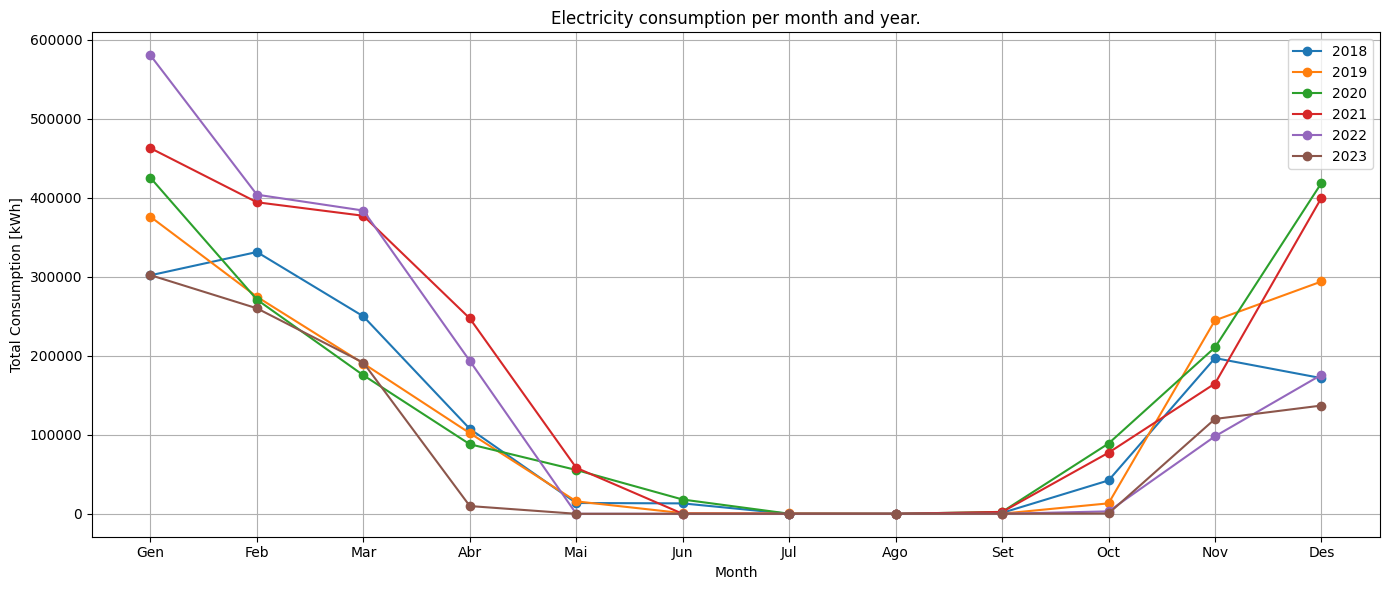

In [ ]:
# calculate monthly and yearly consumption
monthly_consumption = CM.groupby(['Year', 'Month'])['Consum [kWh]'].sum()

# visualization
plt.figure(figsize=(14, 6))

for year, group in monthly_consumption.groupby('Year'):
    plt.plot(group.index.get_level_values('Month'), group.values, marker='o', label=str(year))

plt.title('Electricity consumption per month and year.')
plt.xlabel('Month')
plt.ylabel('Total Consumption [kWh]')
plt.xticks(range(1, 13), list(month_abbr.keys()))  # Usar nombres de los meses abreviados en el eje x
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Electricity consumption for every year (1 plot per year)

<ipython-input-7-83cffb09faa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM['Year'] = CM['Mes'].apply(lambda x: int(x.split()[1]))
<ipython-input-7-83cffb09faa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CM['Month'] = CM['Mes'].apply(lambda x: x.split()[0])


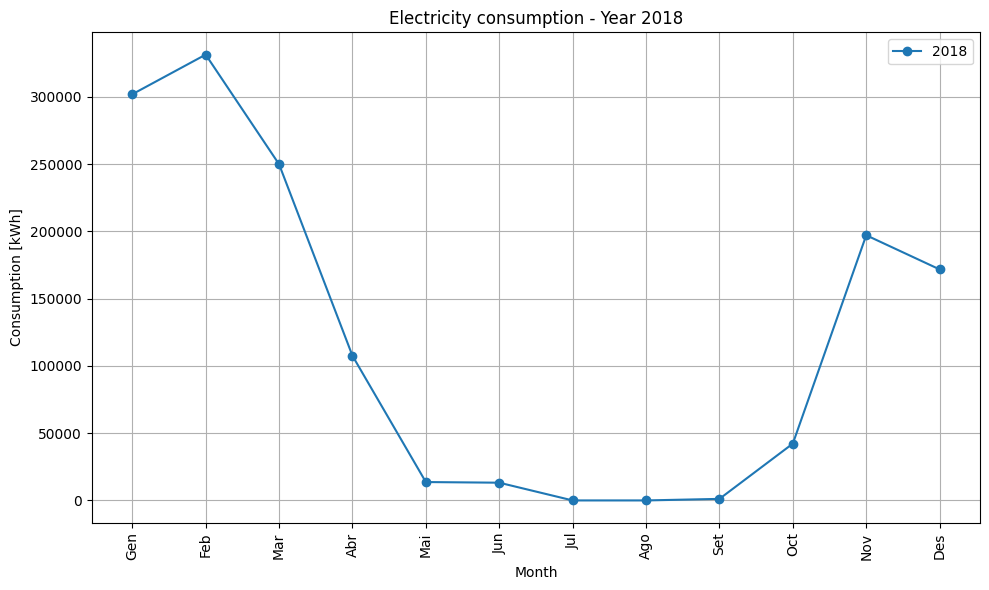

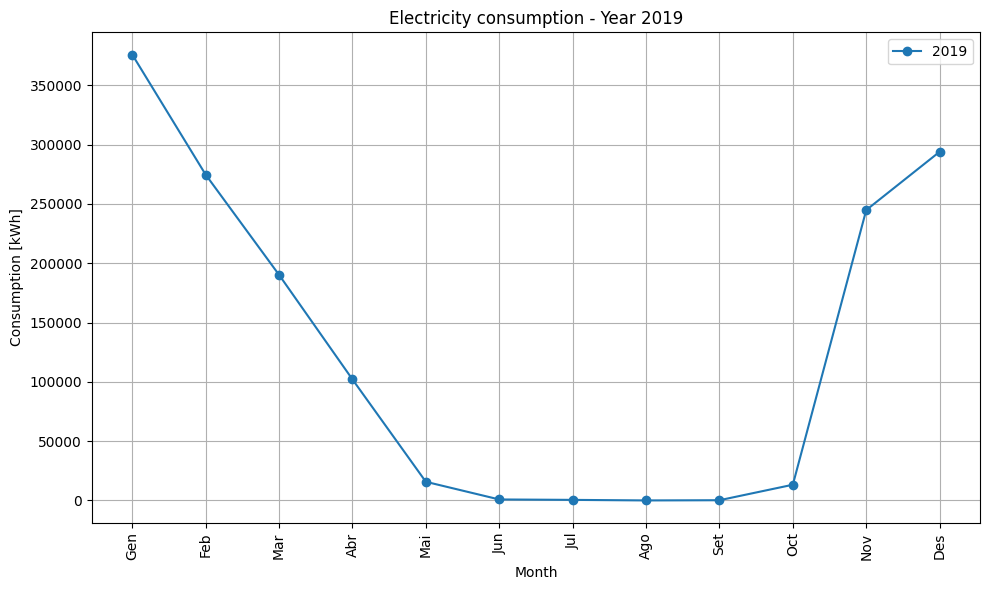

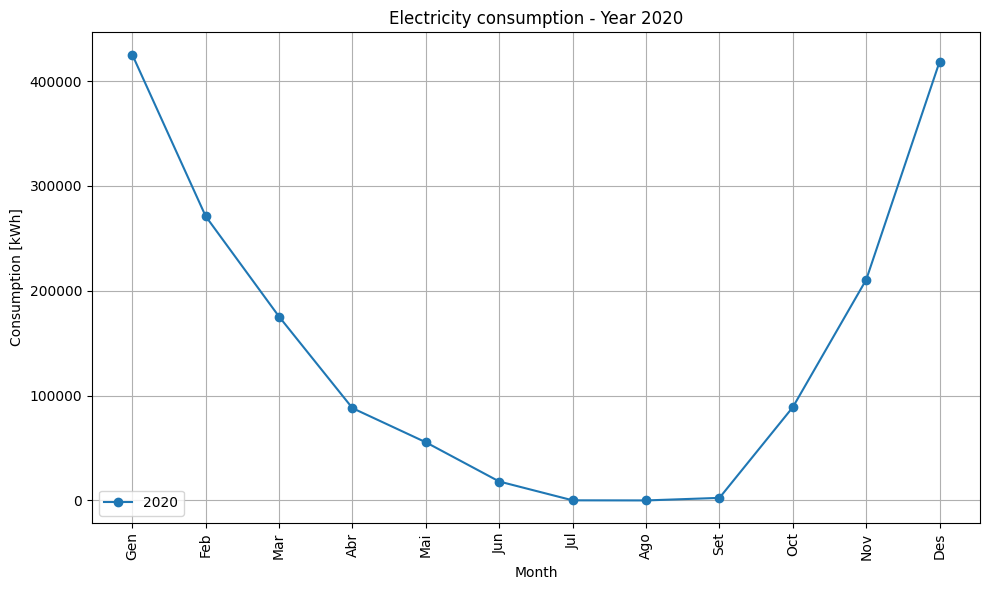

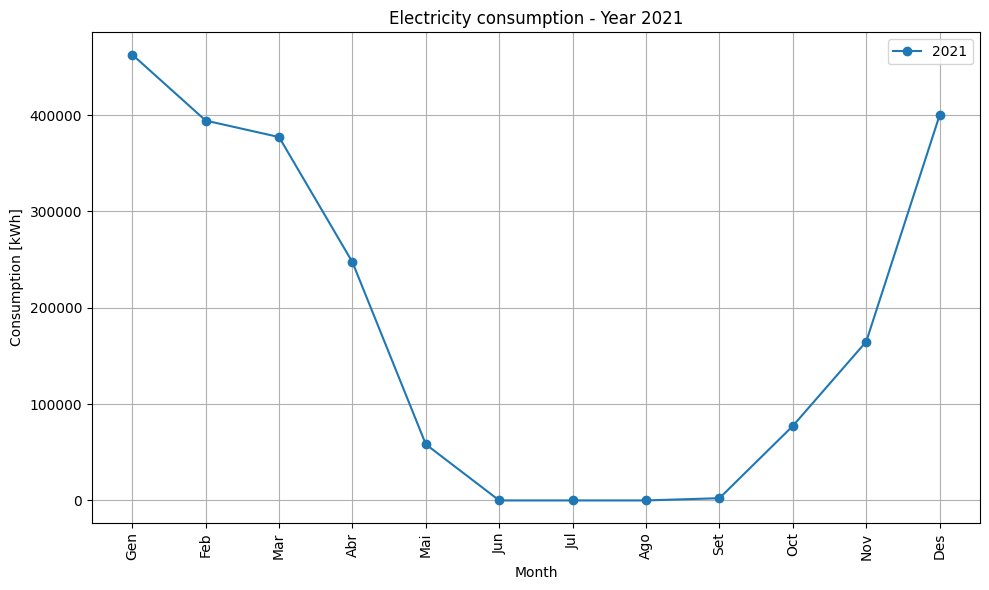

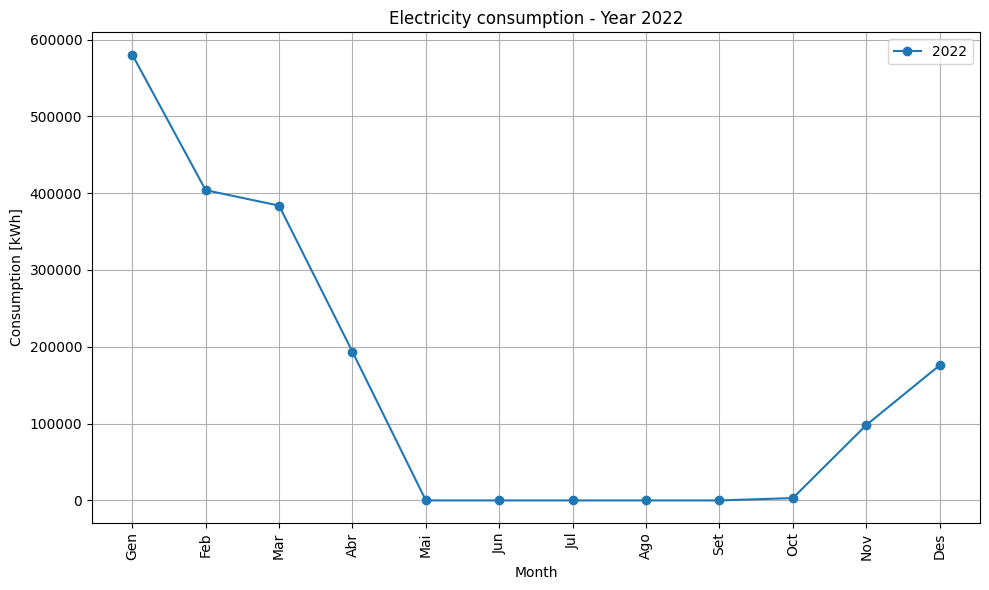

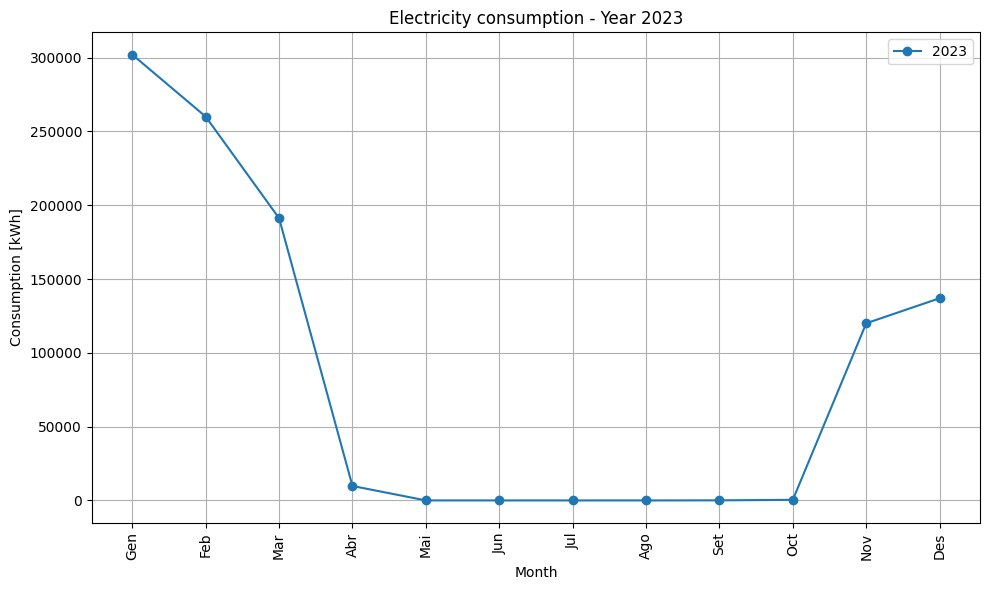

In [ ]:
# extract month and year from date
CM['Year'] = CM['Mes'].apply(lambda x: int(x.split()[1]))
CM['Month'] = CM['Mes'].apply(lambda x: x.split()[0])

# divide the data by year
groups = CM.groupby('Year')

# create a plot for each year
for year, group in groups:
    plt.figure(figsize=(10, 6))
    plt.plot(group['Month'], group['Consum [kWh]'], marker='o', linestyle='-', label=str(year))
    plt.title(f'Electricity consumption - Year {year}')
    plt.xlabel('Month')
    plt.ylabel('Consumption [kWh]')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)  # rotate x-axis labels
    plt.tight_layout()
    plt.show()


##Forecasting

Epoch 1/100
2/2 [==============================] - 6s 908ms/step - loss: 0.1539 - val_loss: 0.0215
Epoch 2/100
2/2 [==============================] - 0s 44ms/step - loss: 0.1256 - val_loss: 0.0143
Epoch 3/100
2/2 [==============================] - 0s 45ms/step - loss: 0.1093 - val_loss: 0.0119
Epoch 4/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0996 - val_loss: 0.0149
Epoch 5/100
2/2 [==============================] - 0s 42ms/step - loss: 0.0964 - val_loss: 0.0207
Epoch 6/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0992 - val_loss: 0.0242
Epoch 7/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0997 - val_loss: 0.0228
Epoch 8/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0961 - val_loss: 0.0189
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0926 - val_loss: 0.0158
Epoch 10/100
2/2 [==============================] - 0s 44ms/step - loss: 0.0902 - val_loss: 0.0143
Epoch 11/100
2/2 [

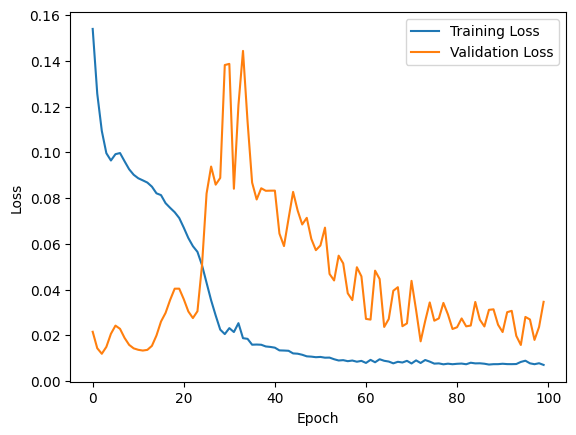

1/1 [==============================] - 0s 22ms/step
Training RMSE: 242139.56974181384
Testing RMSE: 145315.25890376404


In [ ]:
from sklearn.model_selection import train_test_split

# Prepare data for LSTM
def prepare_lstm_data(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Convert monthly consumption to numpy array
consum_values = monthly_consumption.values

# Split the data into train and test sets
train_data, test_data = train_test_split(consum_values, test_size=0.2, shuffle=False)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.reshape(-1, 1)).reshape(-1)
test_scaled = scaler.transform(test_data.reshape(-1, 1)).reshape(-1)

# Prepare data for LSTM
seq_length = 12  # You can adjust this value
X_train, y_train = prepare_lstm_data(train_scaled, seq_length)
X_test, y_test = prepare_lstm_data(test_scaled, seq_length)

# Reshape data for LSTM input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform actual values to original scale
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(np.mean(np.square(train_predict - y_train)))
test_rmse = np.sqrt(np.mean(np.square(test_predict - y_test)))
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
